## Table of Contents:
* [About the Dataset](#introduction)
* [Data Overview](#overview)
* [Question 1: Was There a Year When Items Had to be More Heavily Discounted?](#q1)

## About the Dataset  <a name="introduction"></a>
<br>

Myntra is an ecommerce company founded in Bengaluru, India in 2007. It originally specialized in personolized gift items, but has expanded to hundreds of thousands of products from over 1,000 brands. The company's primary focus is fashion, and the dataset being explored contains more than 44,000 unique products including clothing and accessories for men and women.

This dataset provides a rich framework of pricing, images, and product attributes for exploration. The data represents a sample of SKUs added to the website (https://www.myntra.com/) between 2007 and 2019. 

## Data Overview <a name="overview"></a>
<br>

<h3>General Pricing Data</h3>

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('C:/Users/xcxg109/Documents/Reference/Reviews+Education/capstone/styles2.csv')

There are 41893 items in the collection.

The number of products broken down by category is:

masterCategory
Accessories    11280
Apparel        21393
Footwear        9220
Name: id, dtype: int64


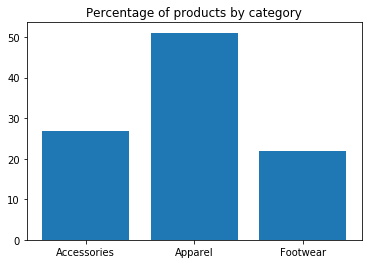

In [206]:
counts = df.groupby(['masterCategory']).count()
items = df['id'].count()

print('There are {} items in the collection.'.format(items))
print('\nThe number of products broken down by category is:\n\n{}'.format(counts['id']))

counts = df.groupby(['masterCategory']).count().reset_index()
prod_per_total = counts['id']/items*100
plt.bar(counts['masterCategory'],prod_per_total)
plt.title('Percentage of products by category')
plt.show()

In [219]:
df['reduction'] = np.where(df['price_disc'] < df['price_us'], df['price_us']-df['price_disc'], np.nan)

ave_price = df.groupby(['masterCategory']).mean().round(2)
disc_items = df['reduction'].count()/items
disc_items = disc_items.round(2)

std_price = df.groupby('masterCategory').std().round(2)
pop_std_price = np.std(df['price_us'])

print('The least expensive item in the collection is ${}, while the most expensive is ${}'
      .format(df['price_us'].min(), df['price_us'].max()))
print('The average item price is ${}, while the price median is ${}.'
      .format(round(df['price_us'].mean(), 2), df['price_us'].median()))
print('\nThe average price breakdown per category is:\n\n {}'.format(ave_price['price_us']))

print('\nThe standard deviation for the entire population price is {}'.format(round(pop_std_price,2)))
print ('Standard price deviation per category is:\n\n{}'.format(std_price['price_us']))
print('\nFrom these statistics, we can summarize that while Apparel makes up the largest ')

The least expensive item in the collection is $1.26, while the most expensive is $405.3
The average item price is $24.31, while the price median is $17.5.

The average price breakdown per category is:

 masterCategory
Accessories    31.24
Apparel        16.05
Footwear       35.01
Name: price_us, dtype: float64

The standard deviation for the entire population price is 24.18
Standard price deviation per category is:

masterCategory
Accessories    33.18
Apparel        12.83
Footwear       24.42
Name: price_us, dtype: float64


In [215]:
ave_price = df.groupby(['masterCategory']).mean().round(2).reset_index()
accessory_disc = ((ave_price.loc[ave_price['masterCategory'] == 'Accessories']['price_us'].mean())
                  -(ave_price.loc[ave_price['masterCategory'] == 'Accessories']['price_disc'].mean()))
apparel_disc = ((ave_price.loc[ave_price['masterCategory'] == 'Apparel']['price_us'].mean())
                -(ave_price.loc[ave_price['masterCategory'] == 'Apparel']['price_disc'].mean()))
footwear_disc = ((ave_price.loc[ave_price['masterCategory'] == 'Footwear']['price_us'].mean())
                 -(ave_price.loc[ave_price['masterCategory'] == 'Footwear']['price_disc'].mean()))

ave_price = df.groupby(['masterCategory']).mean().round(2)

print('Items are sometimes discounted to increase sales. Over the eight years covered in the sample,')
print('{} items, or {} percent of the sample inventory, were discounted.'.format(df['reduction'].count(), disc_items))
print('The average discount price per category is:\n\n {}'.format(ave_price['price_disc']))
print('\nFrom this we can see that Accessories are likely to be discounted at a deeper rate than other categories')
print('(${} average discount vs ${} for apparel and ${} for footwear).'
      .format(round(accessory_disc,2), round(apparel_disc,2), round(footwear_disc,2)))

Items are sometimes discounted to increase sales. Over the eight years covered in the sample,
6622 items, or 0.16 percent of the sample inventory, were discounted.
The average discount price per category is:

 masterCategory
Accessories    29.49
Apparel        15.18
Footwear       34.19
Name: price_disc, dtype: float64

From this we can see that Accessories are likely to be discounted at a deeper rate than other categories
($1.75 average discount vs $0.87 for apparel and $0.82 for footwear).


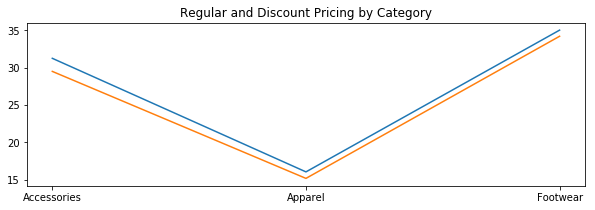

In [210]:
ave_price = df.groupby(['masterCategory']).mean().round(2).reset_index()

ave_price.keys()

plt.figure(figsize=(10,3))
plt.title('Regular and Discount Pricing by Category')
plt.plot(ave_price['masterCategory'], ave_price['price_us'])
plt.plot(ave_price['price_disc'])
plt.show()

<h3>Other Data Summaries</h3>

In [9]:
price_gender = df.groupby(['masterCategory', 'gender']).mean().round(2)

print('The aveage item price per gender is: \n\n{}'.format(price_gender['price_us']))


The aveage item price per gender is: 

masterCategory  gender
Accessories     Boys       3.95
                Girls      6.14
                Men       35.53
                Unisex    24.95
                Women     29.66
Apparel         Boys       7.93
                Girls      7.45
                Men       16.38
                Unisex     9.51
                Women     16.96
Footwear        Boys      13.57
                Girls      9.37
                Men       41.46
                Unisex    19.46
                Women     25.74
Home            Unisex     5.01
Personal Care   Men       20.84
                Unisex    30.75
                Women      9.13
Sporting Goods  Unisex     9.84
Name: price_us, dtype: float64


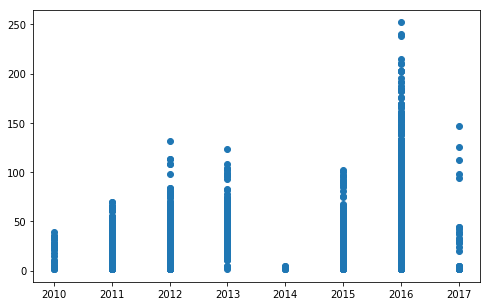

In [48]:
price_test = df.groupby(['masterCategory', 'gender'])
price_test.groups.keys()
#price_test.get_group(('Accessories', 'Girls')).mean()['price_us']
#print(price_test['Accessories', 'Girls'].mean())
plt.figure(figsize=(8, 5))
f, axarr = plt.subplots(6, sharex=True)

acc1 = price_test.get_group(('Accessories', 'Women'))
acc2 = price_test.get_group(('Accessories', 'Men'))
acc3 = price_test.get_group(('Accessories', 'Boys'))
acc4 = price_test.get_group(('Accessories', 'Girls'))
acc5 = price_test.get_group(('Accessories', 'Unisex'))

ax1 = 
plt.scatter(acc1['year'], acc1['price_us'])
#acc1.plot(x='year', y='price_us', style='o')

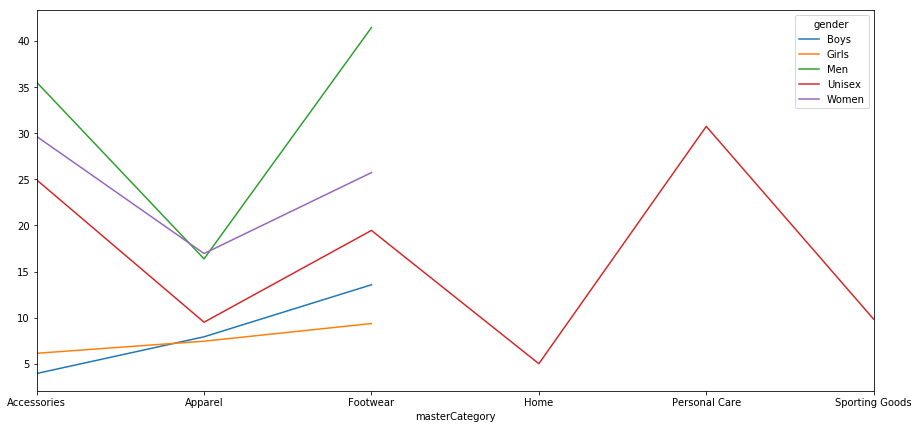

In [60]:
fig, ax = plt.subplots(figsize=(15,7))
price_test = df.groupby(['masterCategory', 'gender']).mean()['price_us'].unstack()
price_test.plot(ax=ax)

TypeError: 'numpy.ndarray' object is not callable

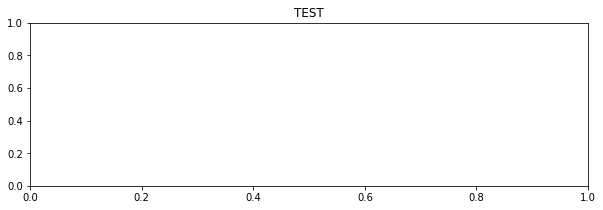

In [214]:
plt.figure(figsize=(10,3))
plt.title('TEST')
plt.plot(list(ave_price.keys()), list(ave_price.values()))
plt.plot(list(ave_disc_price.keys()), list(ave_disc_price.values()))
plt.show()

gender
Boys      AxesSubplot(0.125,0.125;0.775x0.755)
Girls     AxesSubplot(0.125,0.125;0.775x0.755)
Men       AxesSubplot(0.125,0.125;0.775x0.755)
Unisex    AxesSubplot(0.125,0.125;0.775x0.755)
Women     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

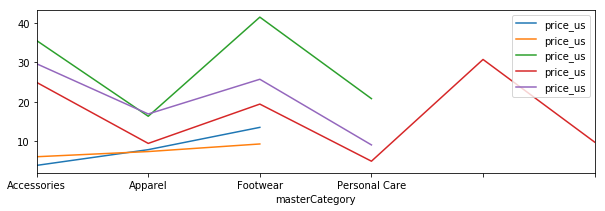

In [258]:
price_gender = price_gender.reset_index()

fig, ax = plt.subplots()
price_gender.groupby('gender').plot(figsize=(10,3), x='masterCategory', y='price_us', ax=ax)

KeyError: False

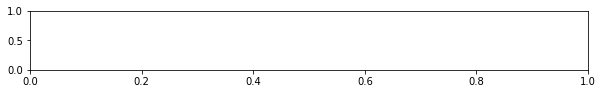

In [278]:
plt.figure(figsize=(10, 5))

plt.subplot(4, 1, 1)
plt.plot(df['masterCategory'=='Accessories'], color='purple')
plt.ylabel('Values')
plt.title('Random Series')

plt.ylabel('Prices USD')

In [265]:
price_gender

,masterCategory,gender,id,price,price_us,price_disc,year,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,reduction
0,Accessories,Boys,30660.76,281.71,3.95,3.95,2013.82,NaN,NaN,NaN,NaN,NaN
1,Accessories,Girls,40500.43,438.43,6.14,6.14,2014.14,NaN,NaN,NaN,NaN,NaN
2,Accessories,Men,34093.90,2538.09,35.53,33.24,2014.33,NaN,NaN,NaN,NaN,5.34
3,Accessories,Unisex,23723.55,1781.81,24.95,21.40,2013.19,NaN,NaN,NaN,NaN,8.16
4,Accessories,Women,36920.31,2118.31,29.66,28.85,2013.85,NaN,NaN,NaN,NaN,6.21
5,Apparel,Boys,31996.80,565.98,7.93,5.82,2011.79,NaN,NaN,NaN,NaN,4.15
6,Apparel,Girls,30528.90,531.99,7.45,5.68,2011.75,NaN,NaN,NaN,NaN,4.00
7,Apparel,Men,21533.69,1169.80,16.38,15.57,2011.87,NaN,NaN,NaN,NaN,6.84
8,Apparel,Unisex,14042.33,679.26,9.51,8.65,2011.14,NaN,NaN,NaN,NaN,6.86
9,Apparel,Women,32981.87,1211.03,16.96,16.19,2012.13,NaN,NaN,NaN,NaN,8.90


## Question 1: Was There a Year When Items Had to be More Heavily Discounted? <a name="overview"></a>

    masterCategory    year        id    price  price_us  price_disc  \
0      Accessories  2008.0  35961.67   908.33     12.72       11.56   
1      Accessories  2009.0  19023.33   375.67      5.26        4.67   
2      Accessories  2010.0  25190.03   945.22     13.24       12.96   
3      Accessories  2011.0  14456.03  1319.85     18.48       16.49   
4      Accessories  2012.0  42935.58  1372.66     19.22       18.18   
5      Accessories  2013.0  44362.67  2136.15     29.91       29.13   
6      Accessories  2014.0  30342.78   941.87     13.19       11.64   
7      Accessories  2015.0  24126.02  1412.54     19.78       18.16   
8      Accessories  2016.0  34912.59  3449.23     48.29       45.89   
9      Accessories  2017.0  35872.05  2737.17     38.32       36.38   
10     Accessories  2018.0  20771.88  2997.50     41.97       38.07   
11         Apparel  2008.0  37341.00   999.00     13.99       13.99   
12         Apparel  2009.0  11727.00  1369.00     19.17       19.17   
13    

masterCategory
Accessories       AxesSubplot(0.125,0.125;0.775x0.755)
Apparel           AxesSubplot(0.125,0.125;0.775x0.755)
Footwear          AxesSubplot(0.125,0.125;0.775x0.755)
Home              AxesSubplot(0.125,0.125;0.775x0.755)
Personal Care     AxesSubplot(0.125,0.125;0.775x0.755)
Sporting Goods    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

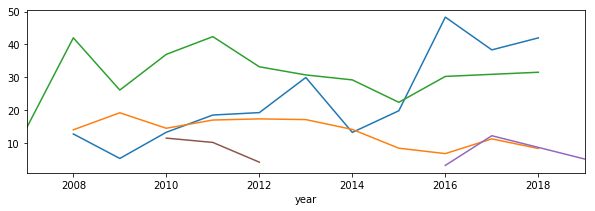

In [247]:
price_year = df.groupby(['masterCategory', 'year']).mean().round(2).reset_index()
print(price_year)

fig, ax = plt.subplots()
price_year.groupby('masterCategory').plot(figsize=(10,3), x='year', y='price_us', ax=ax, legend=False)

In [264]:
discount = df[df['reduction'] != np.nan]
discount['disc_ave'] = discount['reduction']/discount['price_us']

Index(['id', 'price', 'price_us', 'discountedPrice', 'price_disc', 'gender',
       'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season',
       'year', 'usage', 'productDisplayName', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'reduction',
       'disc_ave'],
      dtype='object')

In [ ]:
When items are discounted to boost sales, what is the average amount of that discount?

Is there a correlation between the 'Usage' and 'Season' classifications? For example, 
if a style is listed as sporty ('Usage' = Sports), is it more likely to be a summer item? 
This information could help in creating a product classifier.
 
Difference in average pricing for men vs. women for the different seasons?